                             AI-Based Fake News Detection System


                             

Project Overview:
The goal of this project is to build an AI-powered system that can automatically detect fake news articles. This system will utilize Natural Language Processing (NLP) techniques, machine learning models, and deep learning frameworks to analyze and classify news content as real or fake. The project will encompass data collection, preprocessing, model training, evaluation, and deployment.  
                           
                           Tools & Technologies:
Programming Language: Python
Libraries & Frameworks: Pandas, NumPy, Scikit-learn, TensorFlow, Keras, NLTK, SpaCy, Flask, HTML/CSS
Development Environment: Jupyter Notebook or any Python IDE
Version Control: Git & GitHub

                   Data Preprocessing

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\Rajan Mishra Ji\Downloads\News.csv', index_col=0)
data.head()

data = data.drop(['title', 'subject', 'date'], axis=1)

print(data.shape)


(44919, 2)


                       Data Visualization

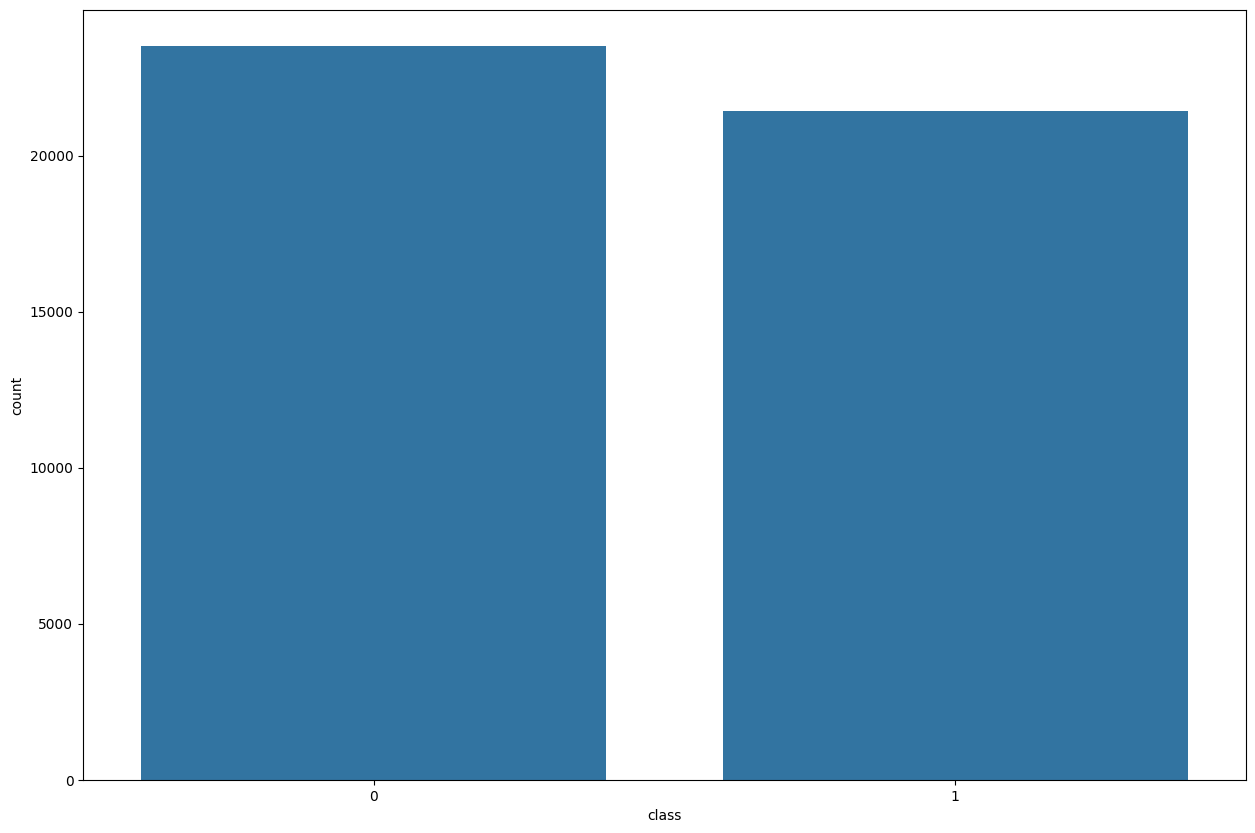

In [3]:
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='class', order=data['class'].value_counts().index)
plt.show()


                    Preprocessing and Analysis of News Column

In [5]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from tqdm import tqdm

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text_data):
    stop_words = set(stopwords.words('english'))  # Load stopwords once
    preprocessed_text = []
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)  # Remove punctuation
        tokens = word_tokenize(sentence.lower())  # Tokenize and convert to lowercase
        filtered_tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
        preprocessed_text.append(' '.join(filtered_tokens))
    return preprocessed_text

# Assuming data is a pandas DataFrame with a column 'text'
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review



[nltk_data] Downloading package punkt to C:\Users\Rajan Mishra
[nltk_data]     Ji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rajan Mishra
[nltk_data]     Ji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 44919/44919 [01:56<00:00, 385.50it/s]


                Converting Text into Vectors

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame and has 'text' and 'class' columns
vectorization = TfidfVectorizer()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.25, random_state=42)

# Fit the vectorizer on the training data and transform both train and test data
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

# Print the shape of the transformed data
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

# Train a simple model (Logistic Regression in this case)
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
  


x_train shape: (33689, 196396)
x_test shape: (11230, 196396)
Model Accuracy: 0.99


                   Model Training, Evaluation, and Prediction

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


0.9930837958977707
0.9874443455031167


          Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


1.0
0.9960819234194123


                         Confusion Matrix

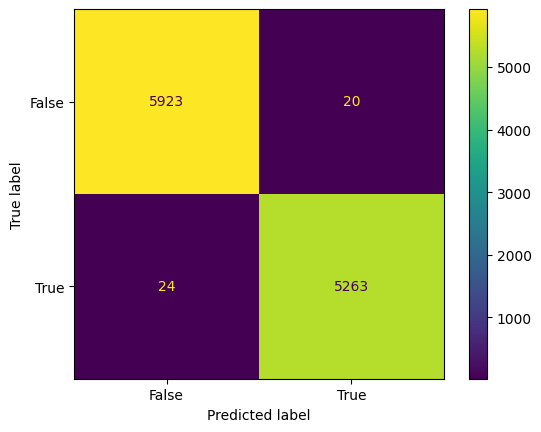

In [13]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, model.predict(x_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()